# Лабораторная работа №1
## Реляционные данные. Исследовательский анализ данных. Построение визуализаций данных OLAP

**Вариант 16** — Housing - SQL Project (Nashville Housing Data)  
**Сложность:** Rare (SQLite3)

**Цель:** провести первичный анализ реляционной базы данных с помощью Python, pandas и библиотеки sqlite3.

## 1. Подключение к базе данных

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

conn = sqlite3.connect('nashville_housing.db')
print('Подключение к БД установлено')

Подключение к БД установлено


## 2. Описание данных

### 2.1 Структура таблиц базы данных

In [5]:
# Список таблиц в базе данных
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print('Таблицы в базе данных:')
print(tables)

Таблицы в базе данных:
      name
0  housing


In [6]:
# Структура таблицы housing
schema = pd.read_sql("PRAGMA table_info(housing)", conn)
print('Схема таблицы housing:')
schema[['name', 'type', 'notnull']]

Схема таблицы housing:


,name,type,notnull
0,UniqueID,INTEGER,0
1,ParcelID,TEXT,0
2,LandUse,TEXT,0
3,PropertyAddress,TEXT,0
4,SaleDate,TEXT,0
5,SalePrice,REAL,0
6,LegalReference,TEXT,0
7,SoldAsVacant,TEXT,0
8,OwnerName,TEXT,0
9,OwnerAddress,TEXT,0


In [9]:
# Загрузка данных в DataFrame
df = pd.read_sql('SELECT * FROM housing', conn)
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 56477 строк, 19 столбцов


,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,0,105 03 0D 008.00,RESIDENTIAL CONDO,"1208 3RD AVE S, NASHVILLE","January 24, 2013",132000.0,20130128-0008725,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,105 11 0 080.00,SINGLE FAMILY,"1802 STEWART PL, NASHVILLE","January 11, 2013",191500.0,20130118-0006337,No,"STINSON, LAURA M.","1802 STEWART PL, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1941.0,2.0,1.0,0.0
2,2,118 03 0 130.00,SINGLE FAMILY,"2761 ROSEDALE PL, NASHVILLE","January 18, 2013",202000.0,20130124-0008033,No,"NUNES, JARED R.","2761 ROSEDALE PL, NASHVILLE, TN",0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2000.0,3.0,2.0,1.0
3,3,119 01 0 479.00,SINGLE FAMILY,"224 PEACHTREE ST, NASHVILLE","January 18, 2013",32000.0,20130128-0008863,No,"WHITFORD, KAREN","224 PEACHTREE ST, NASHVILLE, TN",0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,1948.0,4.0,2.0,0.0
4,4,119 05 0 186.00,SINGLE FAMILY,"316 LUTIE ST, NASHVILLE","January 23, 2013",102000.0,20130131-0009929,No,"HENDERSON, JAMES P. & LYNN P.","316 LUTIE ST, NASHVILLE, TN",0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1910.0,2.0,1.0,0.0


In [10]:
# Типы данных и пропущенные значения
print('Информация о данных:')
df.info()

Информация о данных:
<class 'pandas.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  str    
 2   LandUse          56477 non-null  str    
 3   PropertyAddress  56448 non-null  str    
 4   SaleDate         56477 non-null  str    
 5   SalePrice        56470 non-null  float64
 6   LegalReference   56477 non-null  str    
 7   SoldAsVacant     56477 non-null  str    
 8   OwnerName        25261 non-null  str    
 9   OwnerAddress     26015 non-null  str    
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  str    
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  Fu

In [11]:
# Пропущенные значения
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Пропуски': missing, 'Процент (%)': missing_pct})
print('Пропущенные значения:')
missing_df[missing_df['Пропуски'] > 0]

Пропущенные значения:


,Пропуски,Процент (%)
PropertyAddress,29,0.05
SalePrice,7,0.01
OwnerName,31216,55.27
OwnerAddress,30462,53.94
Acreage,30462,53.94
TaxDistrict,30462,53.94
LandValue,30462,53.94
BuildingValue,30462,53.94
TotalValue,30462,53.94
YearBuilt,32314,57.22


In [12]:
# Описательная статистика количественных признаков
df.describe().round(2)

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,56477.00,56470.00,26015.00,26015.00,26015.00,26015.00,24163.00,24157.00,24275.00,24144.00
mean,28334.00,327226.28,0.50,69068.56,160784.68,232375.40,1963.74,3.09,1.89,0.28
std,16352.59,929882.81,1.57,106040.13,206799.85,281064.35,26.54,0.85,0.96,0.49
min,0.00,50.00,0.01,100.00,0.00,100.00,1799.00,0.00,0.00,0.00
25%,14186.00,135000.00,0.18,21000.00,75900.00,102800.00,1948.00,3.00,1.00,0.00
50%,28313.00,205226.00,0.27,28800.00,111400.00,148500.00,1960.00,3.00,2.00,0.00
75%,42513.00,328500.00,0.45,60000.00,180700.00,268350.00,1983.00,3.00,2.00,1.00
max,56635.00,54278060.00,160.06,2772000.00,12971800.00,13940400.00,2017.00,11.00,10.00,3.00


### 2.2 Описание признаков

| Признак | Тип данных | Шкала | Описание |
|---------|-----------|-------|----------|
| UniqueID | Целое число | — | Уникальный идентификатор записи |
| ParcelID | Текст | Номинальная | Идентификатор земельного участка |
| LandUse | Текст | Номинальная | Тип использования земли (SINGLE FAMILY, DUPLEX и т.д.) |
| PropertyAddress | Текст | Номинальная | Адрес собственности |
| SaleDate | Текст (дата) | Интервальная | Дата продажи |
| **SalePrice** | Вещественное | **Количественная (отношений)** | Цена продажи ($) |
| LegalReference | Текст | Номинальная | Юридическая ссылка на сделку |
| SoldAsVacant | Текст | Бинарная (Yes/No) | Продано как свободный участок |
| OwnerName | Текст | Номинальная | Имя владельца |
| OwnerAddress | Текст | Номинальная | Адрес владельца |
| **Acreage** | Вещественное | **Количественная (отношений)** | Площадь участка (акры) |
| TaxDistrict | Текст | Номинальная | Налоговый округ |
| **LandValue** | Вещественное | **Количественная (отношений)** | Стоимость земли ($) |
| **BuildingValue** | Вещественное | **Количественная (отношений)** | Стоимость здания ($) |
| **TotalValue** | Вещественное | **Количественная (отношений)** | Общая оценочная стоимость ($) |
| **YearBuilt** | Целое число | **Интервальная** | Год постройки |
| **Bedrooms** | Целое число | **Количественная (отношений)** | Количество спален |
| **FullBath** | Целое число | **Количественная (отношений)** | Количество полных ванных комнат |
| **HalfBath** | Целое число | **Количественная (отношений)** | Количество полуванных комнат |

### 2.3 Соединение признаков в одну таблицу для анализа

Выберем ключевые признаки для анализа и очистим данные от пропусков.

In [13]:
# Выбираем ключевые признаки для анализа
cols = ['SalePrice', 'Acreage', 'LandValue', 'BuildingValue', 'TotalValue',
        'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath', 'LandUse',
        'SoldAsVacant', 'TaxDistrict']

df_analysis = df[cols].dropna(subset=['SalePrice', 'YearBuilt', 'Acreage', 'TotalValue'])
print(f'Записей для анализа: {len(df_analysis)} из {len(df)}')
df_analysis.head()

Записей для анализа: 24159 из 56477


,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,LandUse,SoldAsVacant,TaxDistrict
1,191500.0,0.17,32000.0,134400.0,168300.0,1941.0,2.0,1.0,0.0,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
2,202000.0,0.11,34000.0,157800.0,191800.0,2000.0,3.0,2.0,1.0,SINGLE FAMILY,No,CITY OF BERRY HILL
3,32000.0,0.17,25000.0,243700.0,268700.0,1948.0,4.0,2.0,0.0,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
4,102000.0,0.34,25000.0,138100.0,164800.0,1910.0,2.0,1.0,0.0,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
5,93736.0,0.17,25000.0,86100.0,113300.0,1945.0,2.0,1.0,0.0,SINGLE FAMILY,No,URBAN SERVICES DISTRICT


## 3. Одномерный анализ

### 3.1 Гистограмма распределения цены продажи (SalePrice)

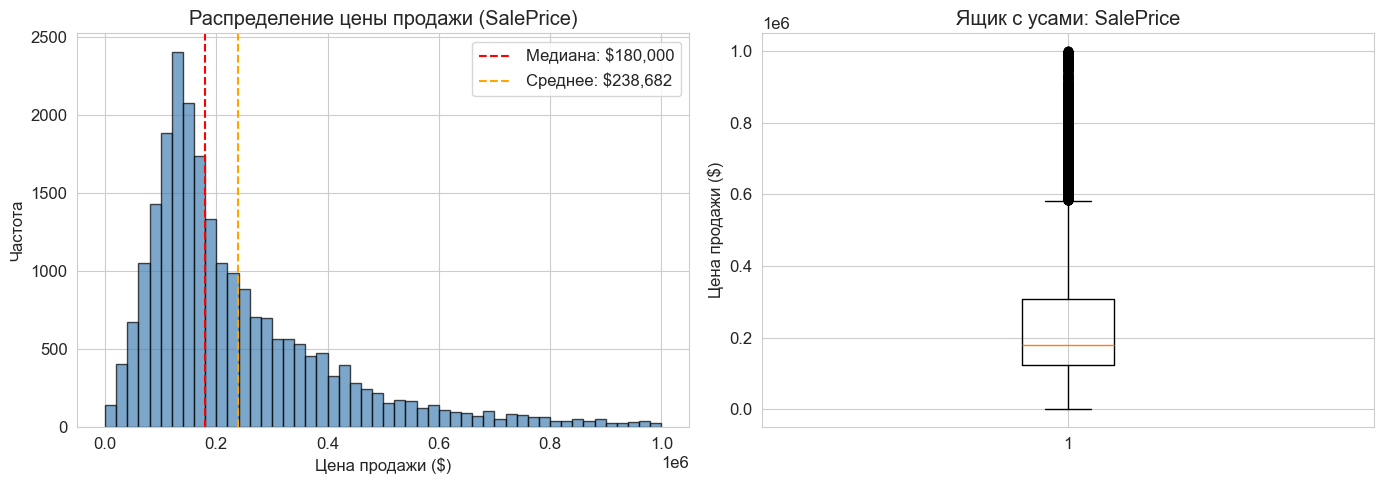

Статистика SalePrice (до $1M):
  Среднее: $238,681.72
  Медиана: $180,000.00
  Ст. отклонение: $173,140.30
  Мин: $100.00
  Макс: $999,999.00


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма SalePrice (ограничим выбросы для наглядности)
sale_data = df_analysis['SalePrice'][(df_analysis['SalePrice'] > 0) & (df_analysis['SalePrice'] < 1_000_000)]

axes[0].hist(sale_data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение цены продажи (SalePrice)')
axes[0].set_xlabel('Цена продажи ($)')
axes[0].set_ylabel('Частота')
axes[0].axvline(sale_data.median(), color='red', linestyle='--', label=f'Медиана: ${sale_data.median():,.0f}')
axes[0].axvline(sale_data.mean(), color='orange', linestyle='--', label=f'Среднее: ${sale_data.mean():,.0f}')
axes[0].legend()

# Boxplot SalePrice
axes[1].boxplot(sale_data, vert=True)
axes[1].set_title('Ящик с усами: SalePrice')
axes[1].set_ylabel('Цена продажи ($)')

plt.tight_layout()
plt.savefig('hist_sale_price.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Статистика SalePrice (до $1M):')
print(f'  Среднее: ${sale_data.mean():,.2f}')
print(f'  Медиана: ${sale_data.median():,.2f}')
print(f'  Ст. отклонение: ${sale_data.std():,.2f}')
print(f'  Мин: ${sale_data.min():,.2f}')
print(f'  Макс: ${sale_data.max():,.2f}')

**Вывод:** Распределение цены продажи имеет **правостороннюю (положительную) асимметрию**. Большинство объектов продается в диапазоне $100 000 — $300 000. Медиана ниже среднего, что подтверждает наличие дорогих выбросов. Это типично для рынка недвижимости, где основная масса — среднеценовое жилье, а небольшая доля — премиальные объекты.

**Важность признака:** SalePrice — целевой признак для анализа рынка недвижимости. Он напрямую отражает рыночную стоимость объекта и является ключевым для оценки инвестиций и прогнозирования цен.

### 3.2 Гистограмма распределения общей оценочной стоимости (TotalValue)

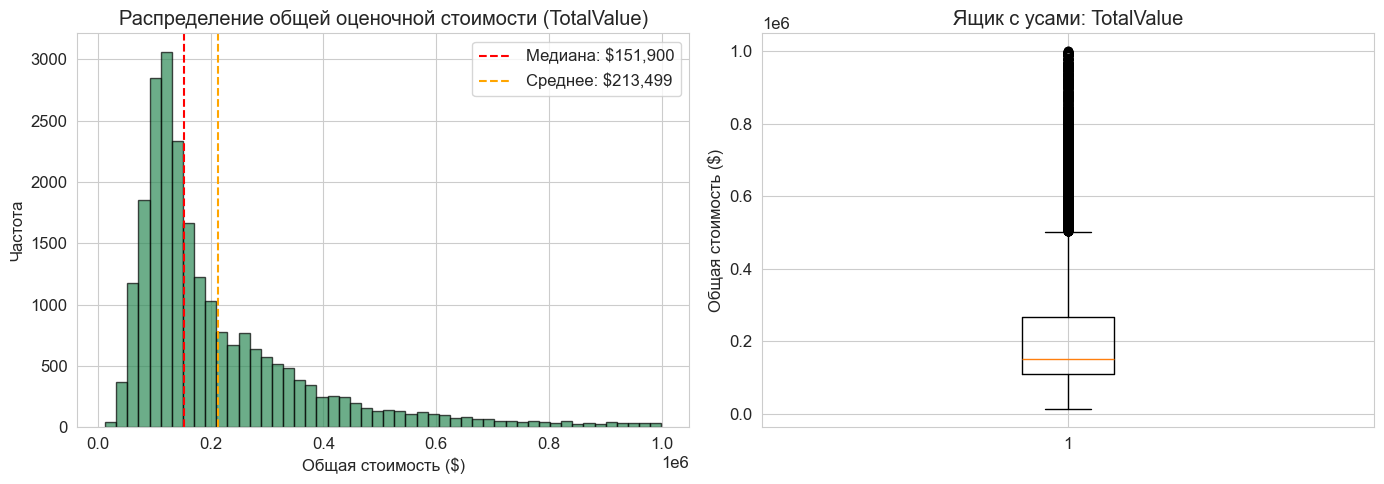

Статистика TotalValue (до $1M):
  Среднее: $213,499.07
  Медиана: $151,900.00
  Ст. отклонение: $164,654.55


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма TotalValue
total_data = df_analysis['TotalValue'][(df_analysis['TotalValue'] > 0) & (df_analysis['TotalValue'] < 1_000_000)]

axes[0].hist(total_data, bins=50, color='seagreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение общей оценочной стоимости (TotalValue)')
axes[0].set_xlabel('Общая стоимость ($)')
axes[0].set_ylabel('Частота')
axes[0].axvline(total_data.median(), color='red', linestyle='--', label=f'Медиана: ${total_data.median():,.0f}')
axes[0].axvline(total_data.mean(), color='orange', linestyle='--', label=f'Среднее: ${total_data.mean():,.0f}')
axes[0].legend()

# Boxplot TotalValue
axes[1].boxplot(total_data, vert=True)
axes[1].set_title('Ящик с усами: TotalValue')
axes[1].set_ylabel('Общая стоимость ($)')

plt.tight_layout()
plt.savefig('hist_total_value.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Статистика TotalValue (до $1M):')
print(f'  Среднее: ${total_data.mean():,.2f}')
print(f'  Медиана: ${total_data.median():,.2f}')
print(f'  Ст. отклонение: ${total_data.std():,.2f}')

**Вывод:** Распределение TotalValue также имеет **правостороннюю асимметрию**, аналогичную SalePrice. Основная масса оценочной стоимости сосредоточена в диапазоне $50 000 — $300 000. Оценочная стоимость обычно ниже рыночной цены продажи.

**Важность признака:** TotalValue — оценочная стоимость, используемая для расчёта налогов. Сравнение с SalePrice позволяет оценить адекватность налогообложения и выявить недооцененные/переоцененные объекты.

## 4. Многомерный анализ

### 4.1 График: SalePrice, TotalValue, LandUse, Bedrooms

Используем 4 признака:
- **SalePrice** (количественный) — ось Y
- **TotalValue** (количественный) — ось X
- **LandUse** (категориальный/номинальный) — цвет точек
- **Bedrooms** (количественный) — размер точек

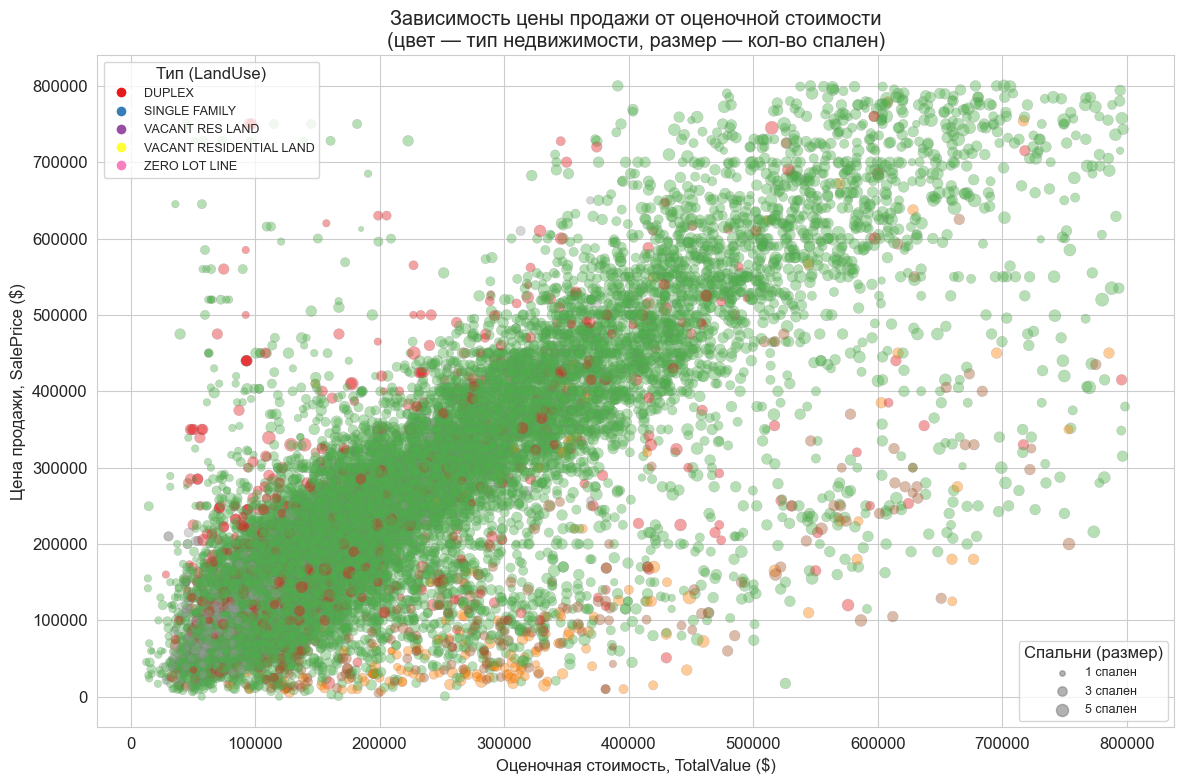

Количество точек на графике: 22626


In [16]:
# Подготовка данных для многомерного графика
df_multi = df_analysis[
    (df_analysis['SalePrice'] > 0) &
    (df_analysis['SalePrice'] < 800_000) &
    (df_analysis['TotalValue'] > 0) &
    (df_analysis['TotalValue'] < 800_000) &
    (df_analysis['Bedrooms'].notna()) &
    (df_analysis['Bedrooms'] > 0) &
    (df_analysis['Bedrooms'] <= 6)
].copy()

# Оставим топ-5 категорий LandUse
top_land_use = df_multi['LandUse'].value_counts().head(5).index
df_multi = df_multi[df_multi['LandUse'].isin(top_land_use)]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_multi['TotalValue'],
    df_multi['SalePrice'],
    c=df_multi['LandUse'].astype('category').cat.codes,
    s=df_multi['Bedrooms'] * 15,
    alpha=0.4,
    cmap='Set1',
    edgecolors='gray',
    linewidth=0.3
)

# Легенда для LandUse
categories = df_multi['LandUse'].astype('category').cat.categories
cmap = plt.cm.Set1
handles = [plt.Line2D([0], [0], marker='o', color='w',
           markerfacecolor=cmap(i / len(categories)), markersize=8,
           label=cat) for i, cat in enumerate(categories)]
legend1 = plt.legend(handles=handles, title='Тип (LandUse)', loc='upper left', fontsize=9)
plt.gca().add_artist(legend1)

# Легенда для Bedrooms (размер)
for beds in [1, 3, 5]:
    plt.scatter([], [], s=beds*15, c='gray', alpha=0.6, label=f'{beds} спален')
plt.legend(title='Спальни (размер)', loc='lower right', fontsize=9)

plt.xlabel('Оценочная стоимость, TotalValue ($)')
plt.ylabel('Цена продажи, SalePrice ($)')
plt.title('Зависимость цены продажи от оценочной стоимости\n(цвет — тип недвижимости, размер — кол-во спален)')
plt.tight_layout()
plt.savefig('multivariate_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Количество точек на графике: {len(df_multi)}')

**Вывод:** На графике видна **сильная положительная линейная зависимость** между оценочной стоимостью (TotalValue) и ценой продажи (SalePrice). Тип недвижимости (LandUse) влияет на ценовой диапазон — например, SINGLE FAMILY доминирует в средних ценах, тогда как другие категории (RESIDENTIAL CONDO, DUPLEX и др.) занимают свои ниши. Количество спален также коррелирует со стоимостью: более крупные точки (больше спален) расположены в области более высоких цен.

**Важность признаков:**
- **TotalValue** и **SalePrice** — ключевые экономические показатели для анализа рынка. Их связь позволяет оценить расхождения между рыночной и оценочной стоимостью.
- **LandUse** — определяет сегмент рынка (жилой дом, дуплекс, кондо и т.д.), что критически важно для сегментации.
- **Bedrooms** — отражает размер жилья и напрямую влияет на стоимость.

## 5. Заключение

В ходе работы был проведён исследовательский анализ базы данных Nashville Housing (56 477 записей, 19 признаков).

**Основные результаты:**
1. База данных содержит одну таблицу `housing` с информацией о продажах недвижимости в Нэшвилле, штат Теннесси.
2. Признаки охватывают: идентификаторы, адреса, параметры сделки (цена, дата), характеристики объекта (площадь, спальни, ванные), оценочные стоимости (земля, здание, итого) и налоговые данные.
3. **Одномерный анализ** показал, что распределения цены продажи и общей оценочной стоимости имеют правостороннюю асимметрию — типичную для рынка недвижимости.
4. **Многомерный анализ** выявил сильную линейную связь между оценочной и рыночной стоимостью, а также влияние типа использования земли и количества спален на цену.

In [17]:
conn.close()
print('Соединение с БД закрыто')

Соединение с БД закрыто
